In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

## 1) Use Pandas’ read_csv function directly on this URL to open it as a DataFrame
(Don’t use any special options). Display the first few rows and the DataFrame info.

You should have seen that the dates were not automatically parsed into datetime types

In [2]:
Data =pd.read_csv ('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')
Data.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake


## 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index


In [3]:
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df = pd.read_csv(url,parse_dates=['time', 'updated'],index_col=['id'])
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

## 3) Use describe to get the basic statistics of all the columns 
Note the highest and lowest magnitude of earthquakes in the databse.

In [4]:
stats=df.describe().round(3)
stats
#Minimum earthquake magnitude is -0.970 while highest magnitude is 8.2

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000,120108.000,120107.000,120065.000,59688.000,94935.000,85682.000,119716.000
mean,2014-07-05 09:10:37.116720128,38.400,-99.961,28.375,1.794,17.878,124.049,0.893,0.358
min,2014-01-01 00:01:16.610000,-73.462,-179.999,-9.900,-0.970,0.000,9.000,0.000,0.000
25%,2014-04-08 03:43:10.768999936,34.229,-147.742,4.100,0.820,8.000,74.000,0.021,0.070
50%,2014-07-07 10:44:06.035000064,38.805,-120.832,9.200,1.400,14.000,107.000,0.074,0.200
75%,2014-09-30 23:36:40.595000064,53.890,-116.068,22.880,2.400,22.000,155.000,0.447,0.590
max,2014-12-31 23:54:33.900000,86.651,179.998,697.360,8.200,365.000,356.400,64.498,8.460
std,NaN,21.938,82.997,62.215,1.343,14.911,68.519,2.904,0.364


## 4) Use nlargest to get the top 20 earthquakes by magnitude

In [5]:
quakes= df.nlargest (n=20, keep ='first', columns ='mag' )

Examine the structure of the place column. The state / country information seems to be in there. How would you get it out?
This can be done by splitting the string characters in the Place column by using the comma delimiter and saveing the split strings into another variable (state_names) as shown below:

In [6]:
state = df['place'].str.split(pat =',', expand =True)
state.head(3)

,0,1,2,3,4
id,,,,,
ak11155107,26km S of Redoubt Volcano,Alaska,None,None,None
nn00436847,32km S of Alamo,Nevada,None,None,None
ak11151142,12km NNW of North Nenana,Alaska,None,None,None


## 5) Extract the state or country using Pandas text data functions
Add it as a new column to the dataframe called country. Note that some of the “countries” are actually U.S. states
.

In [9]:
# country= df.copy(df.insert(1,'state / country', state[1], True))
country.head(3)


,time,state / country,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,Alaska,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,Nevada,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,Alaska,64.6717,-149.2528,7.1,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake


## 6) Display each unique value from the new column

In [10]:
newcol_unique = country['state / country'].unique()
newcol_unique

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri', None, ' Montana',
       ' British Virgin Islands', ' Washington', ' Oregon', ' Canada',
       ' Fiji', ' Antarctica', ' Chile', ' Utah', ' Indonesia',
       ' Solomon Islands', ' Micronesia', ' Oklahoma', ' Hawaii',
       ' Wyoming', ' Russia', ' Arizona', ' Philippines', ' Bolivia',
       ' Greece', ' Japan', ' Puerto Rico', ' Iran', ' Tonga',
       ' Wallis and Futuna', ' Colorado', ' Guam', ' CA', ' Idaho',
       ' Pakistan', ' Burma', ' China', ' Peru', ' Costa Rica',
       ' East Timor', ' Japan region', ' Northern Mariana Islands',
       ' El Salvador', ' Samoa', ' Taiwan', ' Arkansas',
       ' South Sandwich Islands', ' Colombia', ' Dominican Republic',
       ' Argentina', ' Texas', ' New Hampshire', ' Saint Helena',
       ' Tanzania', ' Vanuatu', ' Bosnia and Herzegovina', ' India',
       ' American Samoa', ' Tennessee', ' Kentucky', ' Serbia',
       ' N

## 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [11]:
mag4quakes = country.loc[(country['mag'] >= 4)]
mag4quakes.head (5)

,time,state / country,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,Papua New Guinea,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08 01:43:19+00:00,"115km ESE of Taron, Papua New Guinea",earthquake
usc000mqln,2014-01-31 22:54:32.970,New Zealand,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08 01:43:19+00:00,"120km N of Raoul Island, New Zealand",earthquake
usc000mqls,2014-01-31 22:49:49.740,None,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08 01:43:19+00:00,South of the Fiji Islands,earthquake
usc000mf1x,2014-01-31 22:19:44.330,Alaska,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08 01:43:19+00:00,"72km E of Amatignak Island, Alaska",earthquake
usc000mqlm,2014-01-31 21:56:44.320,Papua New Guinea,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08 01:43:19+00:00,"100km ESE of Taron, Papua New Guinea",earthquake


## 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

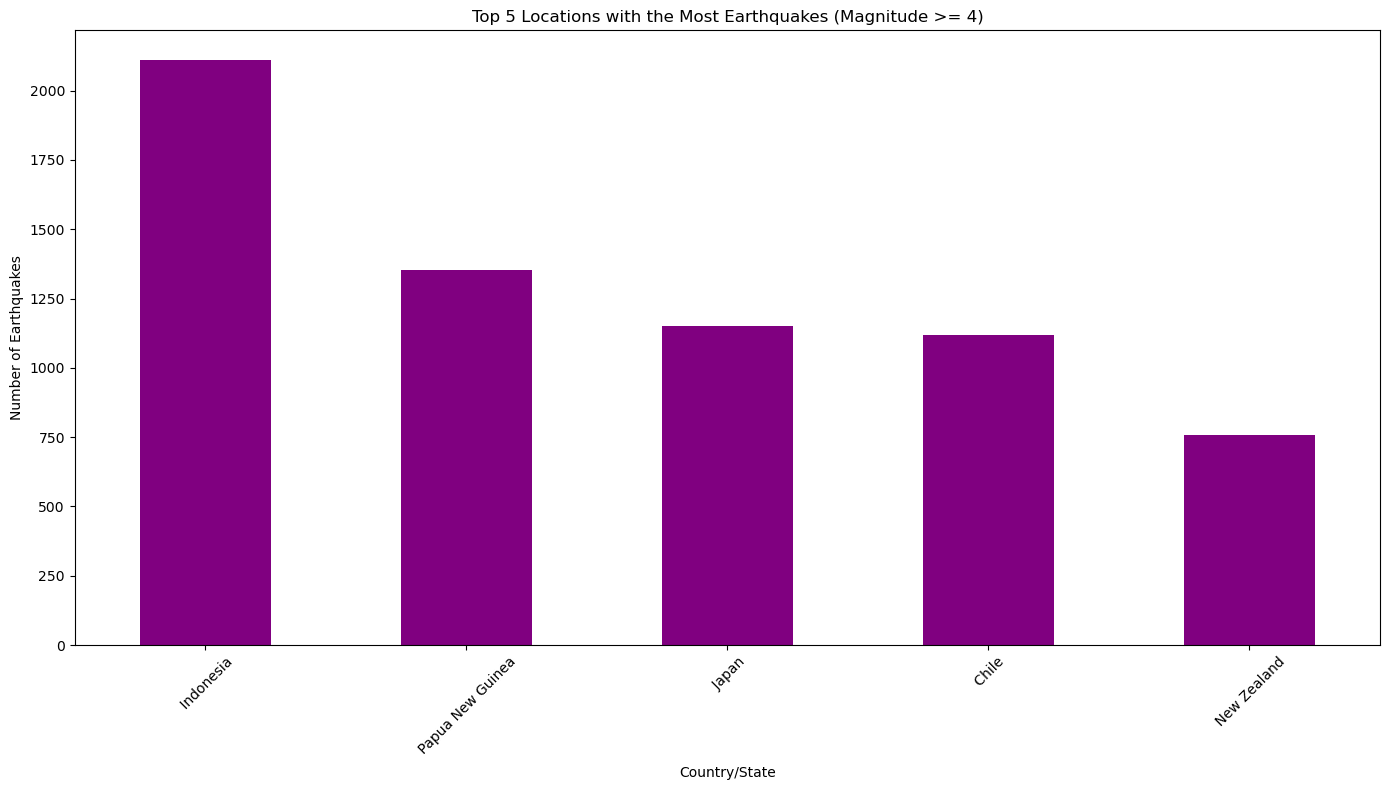

In [12]:
counts = mag4quakes['state / country'].value_counts()
filt=counts.head(5)
plt.figure(figsize=(14, 8))
filt.plot(kind='bar', color='purple')
plt.title('Top 5 Locations with the Most Earthquakes (Magnitude >= 4)')
plt.xlabel('Country/State')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
#plt.grid(axis='y')
plt.tight_layout()

## 9) Make a histogram of the distribution of the Earthquake magnitudes
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset. Use a Logarithmic scale. What sort of relationship do you see?

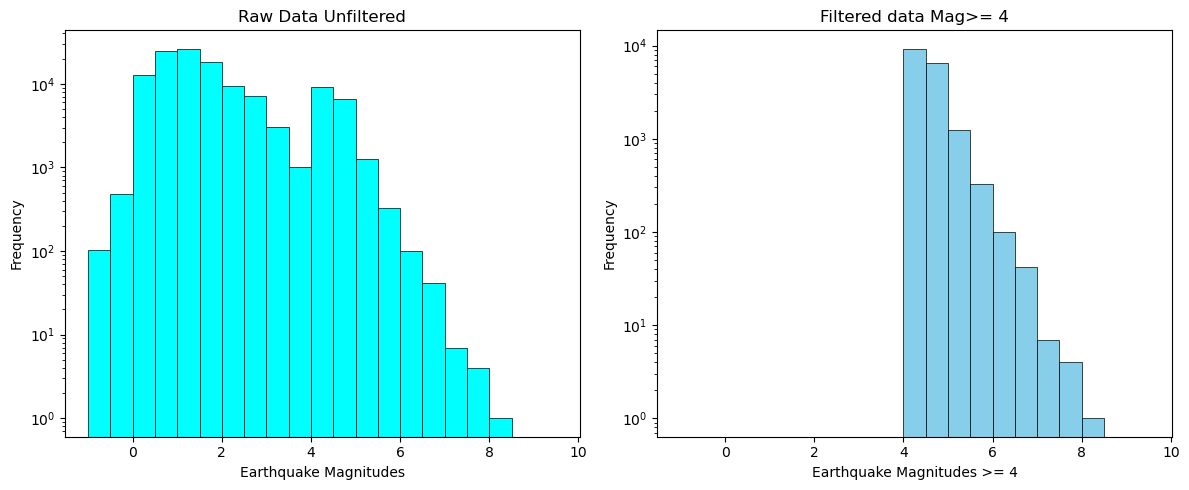

In [13]:
fig = plt.figure(figsize=(12, 5))
axes = fig.subplots(nrows=1, ncols=2)
bins = np.arange(-1, 10, 0.5)
axes[0].hist(country['mag'], color='cyan', bins =bins, edgecolor='black', linewidth=0.5)#unfiltered data 
axes[1].hist(mag4quakes['mag'],color='skyblue', bins =bins, edgecolor='black', linewidth=0.5)#filtered data
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_title('Raw Data Unfiltered')
axes[1].set_title('Filtered data Mag>= 4')
axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')
axes[0].set_xlabel('Earthquake Magnitudes')
axes[1].set_xlabel('Earthquake Magnitudes >= 4')
plt.tight_layout()

The filtered data with "mag >= 4" seems to constitute 50% of all earthquake magnitudes from the databases.  

## 10) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude
Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty. 

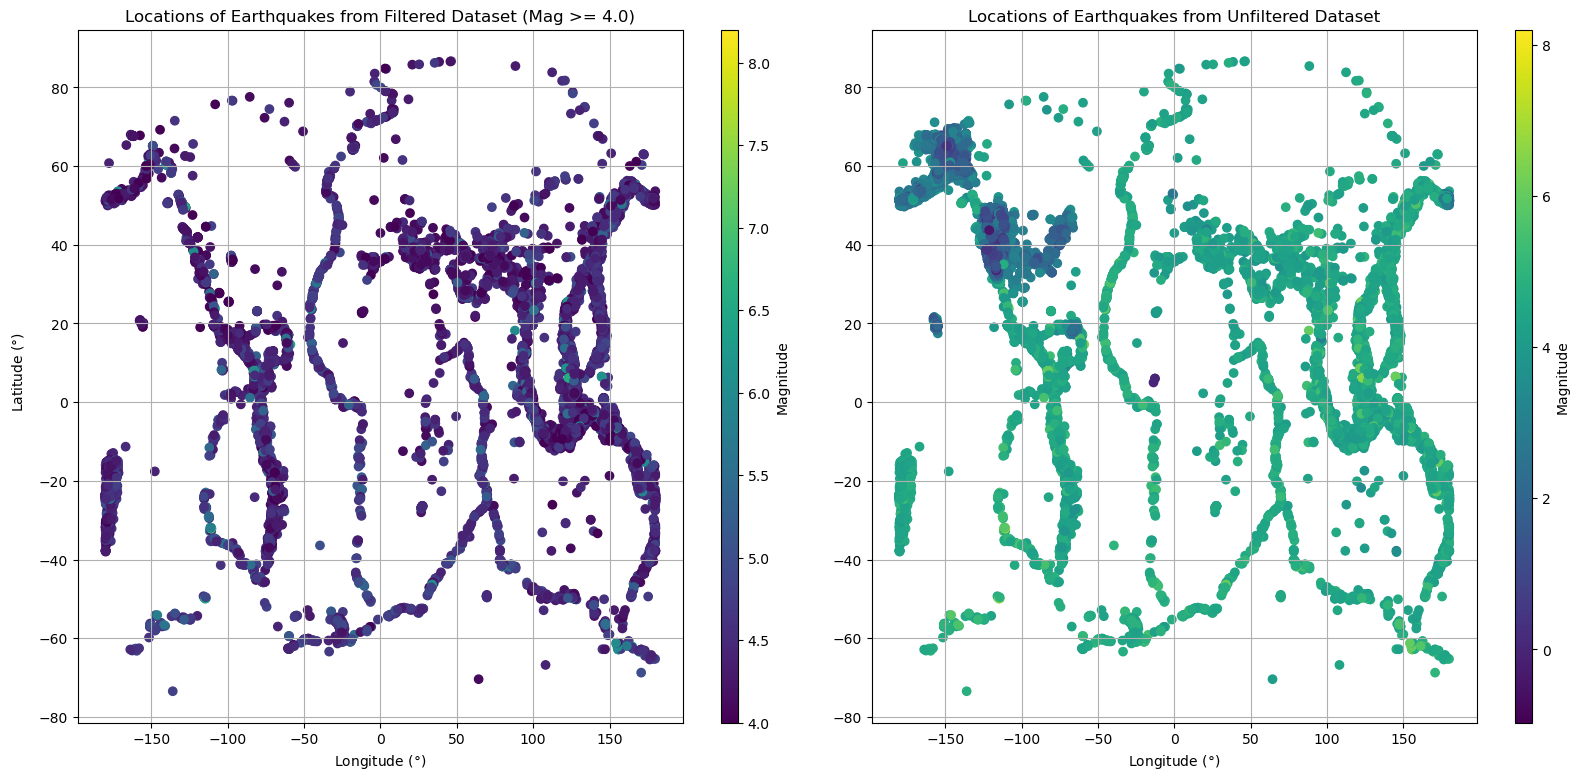

In [19]:
#initialize lon and lat for both filtered and unfiltered datasets
lat = mag4quakes['latitude']
lon = mag4quakes['longitude']
lat1 = country['latitude']
lon1 = country ['longitude']

#make Scatter plot for filtered and unfiltered data
fig = plt.figure(figsize=(20, 9))
axes = fig.subplots(nrows=1, ncols=2)
splot = axes[0].scatter(lon,  lat, c=mag4quakes['mag'])#, s=mag4quakes['mag']*2)
splot1 = axes[1].scatter(lon1, lat1, c=country['mag'])#, s=country['mag']*2 )
axes[0].set_title('Locations of Earthquakes from Filtered Dataset (Mag >= 4.0)')
axes[1].set_title('Locations of Earthquakes from Unfiltered Dataset')
cbar = fig.colorbar(splot, aspect =40)
cbar1 = fig.colorbar(splot1, aspect =40)
cbar.set_label('Magnitude')
cbar1.set_label('Magnitude')
fig.text(0.091, 0.5, 'Latitude ($\xb0$)', va='center', rotation='vertical')
axes[0].grid()
axes[1].grid()
plt.subplots_adjust(wspace=0.05)
axes[0].set_xlabel('Longitude ($\xb0$)')
axes[1].set_xlabel('Longitude ($\xb0$)')
plt.show()

What difference do you note between the filtered and unfiltered datasets?

We can see or get a sense of earthquake hotspots from different geographical locations based on magnitude clearly from the filtered data as opposed to the unfiltered dataset which crams all magnitude from one location.
Additionally, it seems like only a small portion of earthquakes have magnitude < 4 and are mainly located between 20° & 80°N and 50° & 200°W 
